In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df_pheno_all = pd.read_csv("Phenotypic_data_LUAD.tsv", sep= "\t", index_col= 0)

In [3]:

X = df_pheno_all 

X


,samples,Canonical_mut_in_KRAS_EGFR_ALK,Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2,DFI,DFI.time,DSS,DSS.time,gender,PFI,PFI.time,...,MET,pathologic_M,pathologic_N,pathologic_T,additional_surgery_metastatic_procedure,additional_surgery_locoregional_procedure,additional_pharmaceutical_therapy,additional_radiation_therapy,histological_type,history_of_neoadjuvant_treatment
sample,,,,,,,,,,,,,,,,,,,,,
TCGA-49-4486-01,TCGA-49-4486-01,N,N,1.0,2045.0,1.0,2318.0,MALE,1.0,2045.0,...,none,M0,N0,T1,NO,NO,NO,NO,Lung Adenocarcinoma- Not Otherwise Specified (...,No
TCGA-49-4486-11,TCGA-49-4486-11,N,N,1.0,2045.0,1.0,2318.0,MALE,1.0,2045.0,...,none,M0,N0,T1,NO,NO,NO,NO,Lung Adenocarcinoma- Not Otherwise Specified (...,No
TCGA-73-7499-01,TCGA-73-7499-01,N,N,1.0,1447.0,0.0,1531.0,FEMALE,1.0,1447.0,...,none,M0,N0,T2a,YES,NaN,NO,NO,Lung Adenocarcinoma Mixed Subtype,No
TCGA-95-7039-01,TCGA-95-7039-01,N,N,1.0,1258.0,0.0,1272.0,FEMALE,1.0,1258.0,...,none,MX,N0,T3,NaN,NO,NO,NO,Lung Adenocarcinoma- Not Otherwise Specified (...,No
TCGA-78-7152-01,TCGA-78-7152-01,N,N,1.0,1202.0,1.0,1215.0,MALE,1.0,1202.0,...,none,M0,N0,T2,NO,NaN,NO,YES,Lung Adenocarcinoma Mixed Subtype,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-17-Z059-01,TCGA-17-Z059-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-17-Z060-01,TCGA-17-Z060-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-17-Z061-01,TCGA-17-Z061-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.set_option("display.max_columns", 16)


In [5]:
df_clusters = pd.read_excel("LUAD_Table_for_decon.xlsx", sheet_name = 3, index_col = 0)

In [6]:
df_clusters = df_clusters.drop(["histological_type"], axis = 1)

In [7]:

cluster_pheno = df_clusters.join(X)

In [8]:
cluster_pheno.columns

Index(['IL22RA1', 'IL22RA2', 'IL10RB', 'PVR', 'OS', 'OS.time',
       'pathologic_stage', 'sample_type', 'Cluster', 'samples',
       'Canonical_mut_in_KRAS_EGFR_ALK',
       'Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2',
       'DFI', 'DFI.time', 'DSS', 'DSS.time', 'gender', 'PFI', 'PFI.time',
       'ALK_translocation', 'EGFR', 'age_at_initial_pathologic_diagnosis',
       'egfr_mutation_result', 'egfr_mutation_performed',
       'eml4_alk_translocation_method', 'eml4_alk_translocation_performed',
       'kras_mutation_result', 'kras_mutation_found',
       'kras_gene_analysis_performed', 'MET', 'pathologic_M', 'pathologic_N',
       'pathologic_T', 'additional_surgery_metastatic_procedure',
       'additional_surgery_locoregional_procedure',
       'additional_pharmaceutical_therapy', 'additional_radiation_therapy',
       'histological_type', 'history_of_neoadjuvant_treatment'],
      dtype='object')

In [9]:
pheno_means = cluster_pheno.groupby("Cluster").mean()

In [10]:
cluster_pheno["pathologic_T"].value_counts()

T2     162
T2a     80
T1      67
T1b     55
T1a     47
T3      45
T2b     26
T4      19
TX       3
Name: pathologic_T, dtype: int64

In [11]:
cluster_pheno["pathologic_N"].value_counts()

N0    325
N1     95
N2     71
NX     11
N3      2
Name: pathologic_N, dtype: int64

In [12]:
cluster_pheno["pathologic_M"].value_counts()

M0     337
MX     139
M1      18
M1b      5
M1a      2
Name: pathologic_M, dtype: int64

In [13]:
gender_cluster = cluster_pheno.groupby("Cluster")["gender"].value_counts()
gender_cluster

Cluster  gender
0        FEMALE     91
         MALE       84
1        FEMALE    103
         MALE       53
2        MALE       96
         FEMALE     77
Name: gender, dtype: int64

In [14]:
KRAS_EGFR_ALK_per_Cluster = cluster_pheno.groupby("Cluster")["Canonical_mut_in_KRAS_EGFR_ALK"].value_counts()
KRAS_EGFR_ALK_per_Cluster

Cluster  Canonical_mut_in_KRAS_EGFR_ALK
0        N                                 40
         Y                                 28
1        N                                 50
         Y                                 30
2        N                                 38
         Y                                 35
Name: Canonical_mut_in_KRAS_EGFR_ALK, dtype: int64

In [15]:
pT_cluster = cluster_pheno.groupby("Cluster")["pathologic_T"].value_counts()
pN_cluster = cluster_pheno.groupby("Cluster")["pathologic_N"].value_counts()
pM_cluster = cluster_pheno.groupby("Cluster")["pathologic_M"].value_counts()

In [16]:
pT_cluster

Cluster  pathologic_T
0        T2              59
         T3              28
         T2a             25
         T1              17
         T1a             14
         T1b             14
         T2b             10
         T4               6
         TX               2
1        T2              51
         T1              31
         T2a             23
         T1a             18
         T1b             18
         T3               6
         T2b              5
         T4               4
2        T2              52
         T2a             32
         T1b             23
         T1              19
         T1a             15
         T2b             11
         T3              11
         T4               9
         TX               1
Name: pathologic_T, dtype: int64

In [17]:
pN_cluster

Cluster  pathologic_N
0        N0              104
         N2               34
         N1               32
         NX                4
         N3                1
1        N0              103
         N1               34
         N2               15
         NX                3
         N3                1
2        N0              118
         N1               29
         N2               22
         NX                4
Name: pathologic_N, dtype: int64

In [18]:
pM_cluster

Cluster  pathologic_M
0        M0              110
         MX               55
         M1                4
         M1b               3
         M1a               1
1        M0              109
         MX               41
         M1                5
2        M0              118
         MX               43
         M1                9
         M1b               2
         M1a               1
Name: pathologic_M, dtype: int64

In [19]:
pStage_cluster = cluster_pheno.groupby("Cluster")["pathologic_stage"].value_counts()
pStage_cluster

Cluster  pathologic_stage
0        Stage I             76
         Stage II            51
         Stage III           39
         Stage IV             9
1        Stage I             95
         Stage II            35
         Stage III           17
         Stage IV             5
         [Discrepancy]        4
2        Stage I             99
         Stage II            34
         Stage III           25
         Stage IV            12
         [Discrepancy]        3
Name: pathologic_stage, dtype: int64

In [20]:
X.columns

Index(['samples', 'Canonical_mut_in_KRAS_EGFR_ALK',
       'Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2',
       'DFI', 'DFI.time', 'DSS', 'DSS.time', 'gender', 'PFI', 'PFI.time',
       'ALK_translocation', 'EGFR', 'age_at_initial_pathologic_diagnosis',
       'egfr_mutation_result', 'egfr_mutation_performed',
       'eml4_alk_translocation_method', 'eml4_alk_translocation_performed',
       'kras_mutation_result', 'kras_mutation_found',
       'kras_gene_analysis_performed', 'MET', 'pathologic_M', 'pathologic_N',
       'pathologic_T', 'additional_surgery_metastatic_procedure',
       'additional_surgery_locoregional_procedure',
       'additional_pharmaceutical_therapy', 'additional_radiation_therapy',
       'histological_type', 'history_of_neoadjuvant_treatment'],
      dtype='object')

In [21]:
histo_cluster = cluster_pheno.groupby("Cluster")["histological_type"].value_counts()
histo_cluster

Cluster  histological_type                                 
0        Lung Adenocarcinoma- Not Otherwise Specified (NOS)    110
         Lung Adenocarcinoma Mixed Subtype                      34
         Lung Papillary Adenocarcinoma                           8
         Mucinous (Colloid) Carcinoma                            7
         Lung Acinar Adenocarcinoma                              6
         Lung Bronchioloalveolar Carcinoma Nonmucinous           5
         Lung Mucinous Adenocarcinoma                            2
         Lung Bronchioloalveolar Carcinoma Mucinous              1
         Lung Clear Cell Adenocarcinoma                          1
         Lung Solid Pattern Predominant Adenocarcinoma           1
1        Lung Adenocarcinoma- Not Otherwise Specified (NOS)     98
         Lung Adenocarcinoma Mixed Subtype                      39
         Lung Bronchioloalveolar Carcinoma Nonmucinous           7
         Lung Papillary Adenocarcinoma                           3
  

In [22]:
neoadj_cluster = cluster_pheno.groupby("Cluster")['history_of_neoadjuvant_treatment'].value_counts()
neoadj_cluster

Cluster  history_of_neoadjuvant_treatment
0        No                                  173
         Yes                                   2
1        No                                  156
2        No                                  172
         Yes                                   1
Name: history_of_neoadjuvant_treatment, dtype: int64

In [23]:
add_pharm_cluster = cluster_pheno.groupby("Cluster")['additional_pharmaceutical_therapy'].value_counts()
add_pharm_cluster

Cluster  additional_pharmaceutical_therapy
0        NO                                   37
         YES                                  19
1        YES                                  26
         NO                                   23
2        NO                                   21
         YES                                  16
Name: additional_pharmaceutical_therapy, dtype: int64

In [24]:
add_loc_surg_cluster = cluster_pheno.groupby("Cluster")['additional_surgery_locoregional_procedure'].value_counts()
add_loc_surg_cluster

Cluster  additional_surgery_locoregional_procedure
0        NO                                           42
         YES                                           5
1        NO                                           33
         YES                                           7
2        NO                                           34
Name: additional_surgery_locoregional_procedure, dtype: int64

In [25]:
add_met_surg_cluster = cluster_pheno.groupby("Cluster")['additional_surgery_metastatic_procedure'].value_counts()
add_met_surg_cluster

Cluster  additional_surgery_metastatic_procedure
0        NO                                         30
         YES                                        11
1        NO                                         23
         YES                                         7
2        NO                                         26
         YES                                         3
Name: additional_surgery_metastatic_procedure, dtype: int64

In [26]:
add_rad_cluster = cluster_pheno.groupby("Cluster")['additional_radiation_therapy'].value_counts()
add_rad_cluster

Cluster  additional_radiation_therapy
0        NO                              31
         YES                             28
1        NO                              27
         YES                             23
2        YES                             22
         NO                              15
Name: additional_radiation_therapy, dtype: int64

In [27]:
age_counts_cluster = cluster_pheno.groupby("Cluster")['age_at_initial_pathologic_diagnosis'].value_counts()
age_mean_cluster = cluster_pheno.groupby("Cluster")['age_at_initial_pathologic_diagnosis'].mean()

In [28]:
age_mean_cluster

Cluster
0    64.641618
1    66.657895
2    64.763314
Name: age_at_initial_pathologic_diagnosis, dtype: float64

In [29]:
age_counts_cluster

Cluster  age_at_initial_pathologic_diagnosis
0        59.0                                   10
         61.0                                    9
         71.0                                    8
         68.0                                    7
         69.0                                    7
                                                ..
2        49.0                                    1
         81.0                                    1
         83.0                                    1
         84.0                                    1
         87.0                                    1
Name: age_at_initial_pathologic_diagnosis, Length: 125, dtype: int64

In [30]:
Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2_cluster = cluster_pheno.groupby("Cluster")['Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2'].value_counts()
Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2_cluster

Cluster  Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2
0        Y                                                                   35
         N                                                                   33
1        Y                                                                   42
         N                                                                   38
2        Y                                                                   42
         N                                                                   31
Name: Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2, dtype: int64

In [31]:
#PFS

from lifelines import KaplanMeierFitter
T = cluster_pheno["PFI.time"]
E = cluster_pheno["PFI"]
kmf = KaplanMeierFitter()
clusters = cluster_pheno["Cluster"]
cl0 = (clusters == 0)
cl1 = (clusters == 1) 
cl2 = (clusters == 2)

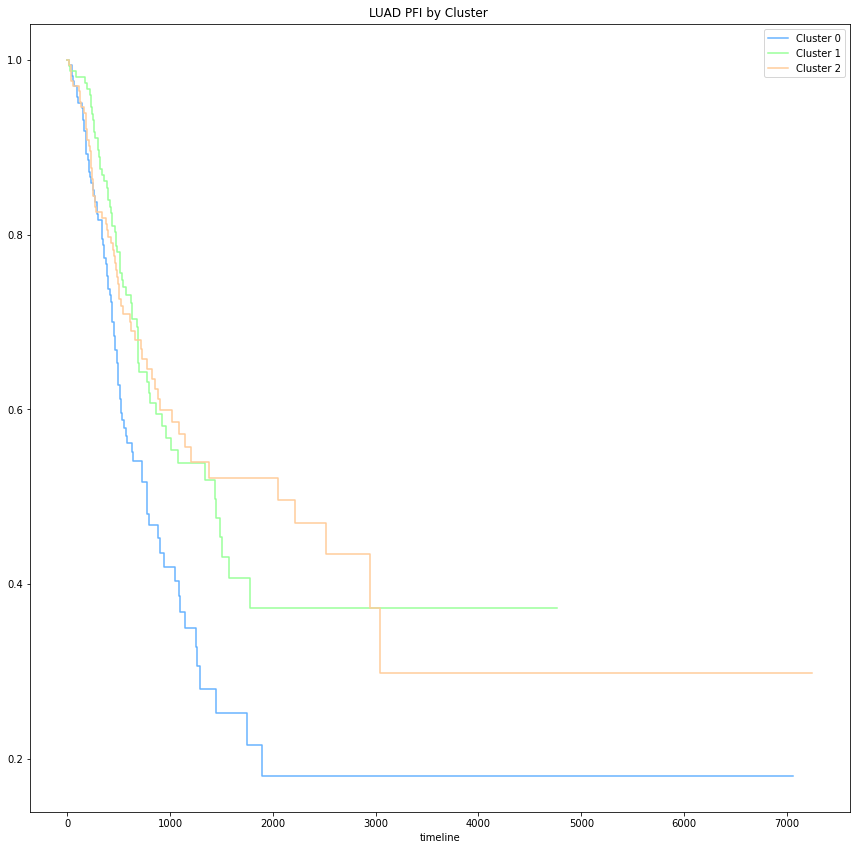

In [32]:
#plotting all cluster PFI times w/o confidence intervals for visibility

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))

kmf0= KaplanMeierFitter()
ax = kmf0.fit(T[cl0], E[cl0], label="Cluster 0").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#66b3ff")

kmf1= KaplanMeierFitter()
ax = kmf1.fit(T[cl1], E[cl1], label="Cluster 1").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#99ff99")

kmf2= KaplanMeierFitter()
ax = kmf2.fit(T[cl2], E[cl2], label="Cluster 2").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#ffcc99")
fig.suptitle("LUAD PFI by Cluster")
plt.savefig(fname = "LUAD_PFI_clusters.svg", format = "svg")
plt.tight_layout()

In [33]:
# logrank test of cluster 1 vs cluster 2
from lifelines.statistics import logrank_test

results = logrank_test(T[cl1], T[cl2], E[cl1], E[cl2], alpha=.95)# logrank test of cluster 1 vs cluster 2
from lifelines.statistics import logrank_test

results = logrank_test(T[cl1], T[cl2], E[cl1], E[cl2], alpha=.95)

results.print_summary()

results.print_summary()

/home/oleg/repos/whatever/TCGA_clustering/.venv/lib/python3.10/site-packages/lifelines/statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.04 0.84      0.25

/home/oleg/repos/whatever/TCGA_clustering/.venv/lib/python3.10/site-packages/lifelines/statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.04 0.84      0.25

In [34]:
# logrank test of cluster 0 vs cluster 1
from lifelines.statistics import logrank_test

results = logrank_test(T[cl0], T[cl1], E[cl0], E[cl1], alpha=.95)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           9.73 <0.005      9.11

In [35]:
# logrank test of cluster 0 vs cluster 2
from lifelines.statistics import logrank_test

results = logrank_test(T[cl0], T[cl2], E[cl0], E[cl2], alpha=.95)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           9.16 <0.005      8.66

In [36]:
df_DSS = cluster_pheno[["Cluster", "DSS", "DSS.time"]]
df_DSS = df_DSS.dropna()
df_DSS["Cluster"].value_counts()

0    165
2    159
1    145
Name: Cluster, dtype: int64

In [37]:
cluster_pheno["Cluster"].value_counts()

0    175
2    173
1    156
Name: Cluster, dtype: int64

In [38]:
#DSS

from lifelines import KaplanMeierFitter
T = df_DSS["DSS.time"]
E = df_DSS["DSS"]
kmf = KaplanMeierFitter()
clusters = df_DSS["Cluster"]
cl0 = (clusters == 0)
cl1 = (clusters == 1) 
cl2 = (clusters == 2)

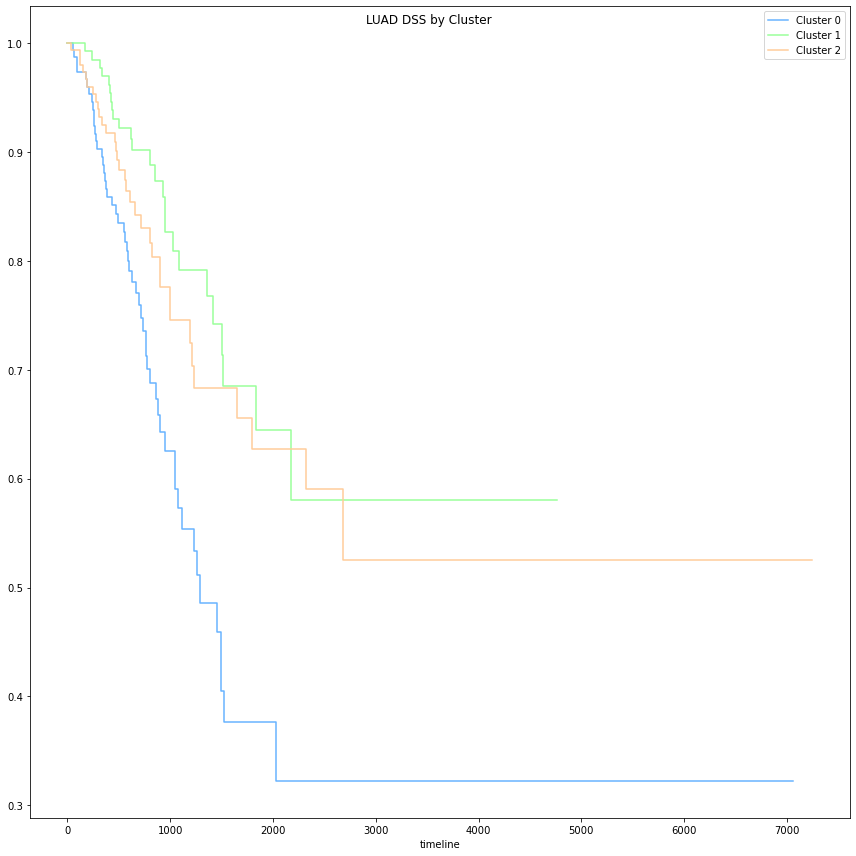

In [39]:
#plotting all cluster DSS times w/o confidence intervals for visibility

fig, (ax) = plt.subplots(nrows = 1, ncols = 1, sharex = True, figsize = (12, 12))

kmf0= KaplanMeierFitter()
ax = kmf0.fit(T[cl0], E[cl0], label="Cluster 0").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#66b3ff")

kmf1= KaplanMeierFitter()
ax = kmf1.fit(T[cl1], E[cl1], label="Cluster 1").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#99ff99")

kmf2= KaplanMeierFitter()
ax = kmf2.fit(T[cl2], E[cl2], label="Cluster 2").plot(ax=ax, figsize = (12, 12), ci_show = False, color = "#ffcc99")
fig.suptitle("LUAD DSS by Cluster")
plt.savefig(fname = "LUAD_DSS_clusters.svg", format = "svg")
plt.tight_layout()

In [40]:
# logrank test of cluster 1 vs cluster 2
from lifelines.statistics import logrank_test

results = logrank_test(T[cl1], T[cl2], E[cl1], E[cl2], alpha=.95)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.10 0.29      1.77

In [41]:
# logrank test of cluster 0 vs cluster 1
from lifelines.statistics import logrank_test

results = logrank_test(T[cl0], T[cl1], E[cl0], E[cl1], alpha=.95)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          15.88 <0.005     13.86

In [42]:
# logrank test of cluster 0 vs cluster 2
from lifelines.statistics import logrank_test

results = logrank_test(T[cl0], T[cl2], E[cl0], E[cl2], alpha=.95)

results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.72 0.01      7.52

In [79]:
with pd.ExcelWriter('LUAD_pheno_analysis.xlsx') as writer:
    cluster_pheno.to_excel(writer, sheet_name='Raw')
    gender_cluster.to_excel(writer, sheet_name='Gender')
    age_mean_cluster.to_excel(writer, sheet_name="age_mean")
    age_counts_cluster.to_excel(writer, sheet_name="age_counts")
    histo_cluster.to_excel(writer, sheet_name="Histo_Subtype")
    pT_cluster.to_excel(writer, sheet_name="pT")
    pN_cluster.to_excel(writer, sheet_name="pN")
    pM_cluster.to_excel(writer, sheet_name="pM")
    KRAS_EGFR_ALK_per_Cluster.to_excel(writer, sheet_name="KRAS_EGFR_ALK_per_Cluster")
    Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2_cluster.to_excel(writer, sheet_name="More mutations included")
    neoadj_cluster.to_excel(writer, sheet_name="History_neoadj_treatment")
    add_pharm_cluster.to_excel(writer, sheet_name="add_pharmacologic_treatment")
    add_rad_cluster.to_excel(writer, sheet_name="add_radiation_treatment")
    add_loc_surg_cluster.to_excel(writer, sheet_name="add_locoregional_surgical_proc")
    add_met_surg_cluster.to_excel(writer, sheet_name="add_metastatic_surgical_proc")
    